# Sawtooth - Physics 505 Computational HW
Compute the first 5 terms of the sine Fourier series for a downward ramping sawtooth wave with a frequency of 0.2 Hz and an amplitude of 1. 
Present the coefficients that you found in a table, and make a plot of the approximated wave function for the first term, the first 2 terms, etc., up to the first 5 terms. 
Compare your plot with the graph from: https://www.desmos.com/calculator/lab9nylxsi.


We setup the needed libraries and define some variables. This is useful because it allows you to easily change them and make sure the output changes in the ways you expect, i.e. changing the value of $N$ should not change anything in our result (uless chosen much too small.)

Next we define the sawtooth function. In this case we want a ramp-down which is centered on y=0, and has a period of 5 seconds. Looking at the Fourier Transforms notebook, we find that `np.mod(t,T)/T` gives a ramp-up function from 0 to 1 with a period of $T$. Thus `0.5 - np.mod(t,T)/T` gives a rampd-down starting at 0.5 and ending at -0.5 in $T$ seconds, exactly what we want. 

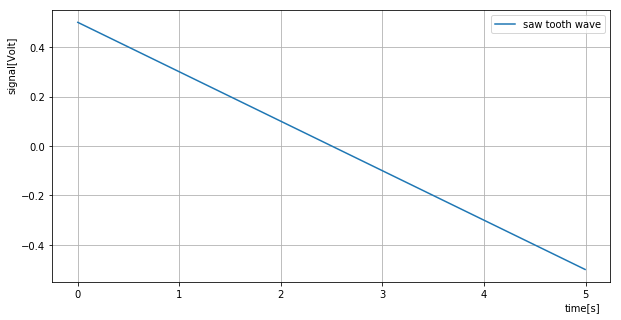

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
F = 0.2
T = 1/F
N=  1000   # In general FFTs go faster if you do them over 2 to the power N points. 2**20 is A LOT of points!!!
Cmax = 8   # Highest coefficient to compute.
n = np.array(range(N))
t = n*T/N  # Create a correctly spaced array for time.
# t = np.linspace(0,T,N)    # This does almost the same thing, except for the last point.           
y_sawtooth = 0.5- np.mod(t,T)/T    # This creates the sawtooth with amplitude 1.
plt.figure(figsize=(10,5))
plt.plot(t,y_sawtooth,label="saw tooth wave")
plt.grid(True)
plt.legend(loc="upper right")
plt.xlabel("time[s]",position=(0.95,1))
plt.ylabel("signal[Volt]",position=(1,0.8))
#ax = plt.gca()
#ax.set_xlim(0,1)
plt.show()

We now compute the coefficients. We need to do the integral for the $a_n$ coefficients as a sum over the $N$ data points. You can either have $\sin(2\pi k n/N)$, or $\sin(2\pi k t/T)$ in your sum. Verify for yourself this amounts to the same thing.

In [2]:
coeffs = 2*np.array([ np.sum(y_sawtooth*np.sin( 2*np.pi*k*t/T) )/N for k in range(Cmax) ])

Here we plot the coefficients as a bar graph and print the numbers. Note that the numers are fractions of $\pi$, so multiplying by $\pi$ and taking the reciprocal shows this trend more clearly.

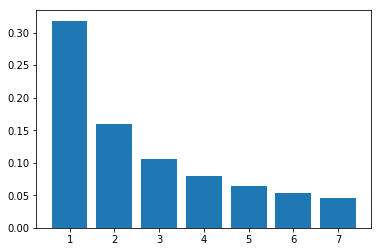

a1 = 0.31831   1/(a1 π) = 1.00000 
a2 = 0.15915   1/(a2 π) = 2.00003 
a3 = 0.10610   1/(a3 π) = 3.00009 
a4 = 0.07957   1/(a4 π) = 4.00021 
a5 = 0.06366   1/(a5 π) = 5.00041 
a6 = 0.05305   1/(a6 π) = 6.00071 
a7 = 0.04547   1/(a7 π) = 7.00113 


In [8]:
plt.bar(range(1,Cmax),coeffs[1:Cmax] )
plt.show()
for i in range(1,Cmax):
    print("a{} = {:7.5f}   1/(a{} π) = {:7.5f} ".format(i,coeffs[i],i,1/(coeffs[i]*np.pi)))

Below we make a plot where we add each term to all the previous ones for an increasingly better approximation to our initial wave function.

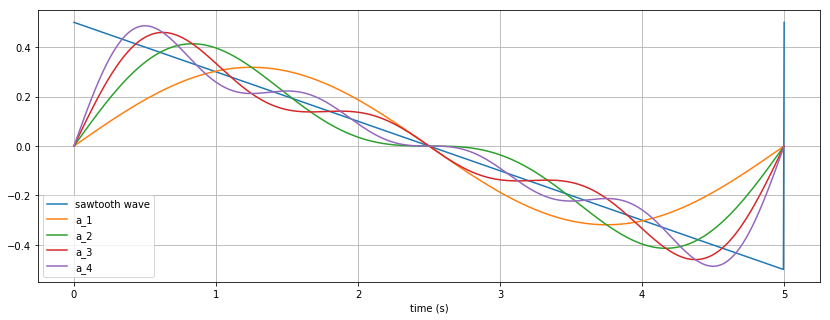

In [4]:
plt.figure(figsize=(14,5))
t = np.linspace(0,T,N)
y_saw = 0.5- np.mod(t,1/F)*F    # This creates the sawtooth with amplitude 1.
plt.plot(t,y_saw,label="sawtooth wave")
waves=np.zeros_like(t)
for i in range(1,5):
    waves+= coeffs[i]*np.sin(2*np.pi*i*t/T)
    plt.plot(t,waves,label="a_{}".format(i))
plt.grid(True)
plt.legend()
plt.xlabel("time (s)")
plt.show()


To test that everything is working correctly, you are highly advised to change the value for $N$, and to change $F$, to make sure everything still looks the same. 

Below the plot for $-T$ to $2T$, up to higher order, just because.

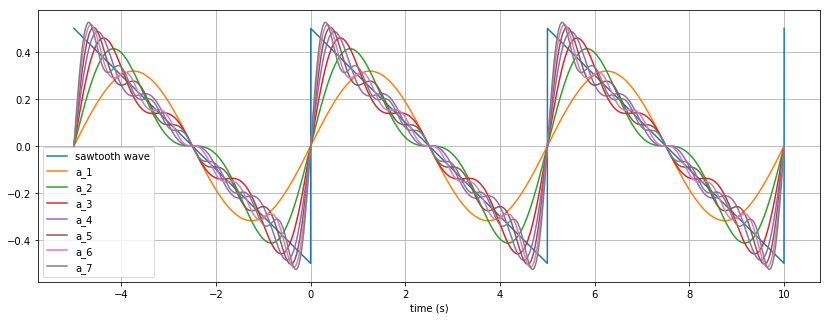

In [5]:
plt.figure(figsize=(14,5))
t = np.linspace(-T,2*T,5*N)
y_saw = 0.5- np.mod(t,1/F)*F    # This creates the sawtooth with amplitude 1.
plt.plot(t,y_saw,label="sawtooth wave")
waves=np.zeros_like(t)
for i in range(1,len(coeffs)):
    waves+= coeffs[i]*np.sin(2*np.pi*i*t/T)
    plt.plot(t,waves,label="a_{}".format(i))
plt.grid(True)
plt.legend()
plt.xlabel("time (s)")
plt.show()